In [4]:
!ls
# Numerical Imporst 
import pandas as pd
import numpy as np
import scipy 

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
%matplotlib notebook

# Python 
import os

# sklearn 
from sklearn.metrics import f1_score # f1_score(y_true, y_pred)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

# scipy
from scipy.cluster import hierarchy as hc # for dendograms 

final_after_na.ipynb  NA with RNA-Seq.ipynb  sum_tab_1.csv  train_pro.tsv
Full.ipynb	      Proteomics.ipynb	     sum_tab_2.csv  train_rna.tsv
Gender Visual.ipynb   README.txt	     test_cli.tsv   visuals.ipynb
Import.ipynb	      RNA-Seq Final.ipynb    test_pro.tsv
MSI Visual.ipynb      RNA-Seq.ipynb	     test_rna.tsv
NA.ipynb	      start.ipynb	     train_cli.tsv


In [5]:
df_train_pro = pd.read_table(f'{os.getcwd()}/train_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_pro = pd.read_table(f'{os.getcwd()}/test_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_rna = pd.read_table(f'{os.getcwd()}/train_rna.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_rna = pd.read_table(f'{os.getcwd()}/test_rna.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_cli = pd.read_csv(f'{os.getcwd()}/train_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_test_cli = pd.read_csv(f'{os.getcwd()}/test_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_train_mislabel = pd.read_csv(f'{os.getcwd()}/sum_tab_1.csv', 
                           low_memory=False,)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [6]:
# df_train_pro
# df_test_pro
# df_train_rna
# df_test_rna
# df_train_cli
# df_test_cli
# df_train_mislabel

In [7]:
# Come back to the way you handle this NA, sophisticated way will imporve by at least 5% 
train_pro = df_train_pro.copy(deep=True)
train_pro = train_pro.fillna(train_pro.median())
train_pro.index.name = 'sample'

test_pro = df_test_pro.copy(deep=True)
test_pro = test_pro.fillna(test_pro.median())
test_pro.index.name = 'sample'


train_rna = df_train_rna.copy(deep=True)
train_rna = train_rna.fillna(train_rna.median())
train_rna.index.name = 'sample'

test_rna = df_test_rna.copy(deep=True)
test_rna = test_rna.fillna(test_rna.median())
test_rna.index.name = 'sample'

In [8]:
# df_train_pro
# train_pro
# df_test_pro
# test_pro

In [9]:
# df_train_rna
# train_rna
# df_test_rna
# test_rna

In [10]:
train_cli = df_train_cli.copy(deep=True)
train_cli = train_cli.set_index('sample')
train_cli = train_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

test_cli = df_test_cli.copy(deep=True)
test_cli = test_cli.set_index('sample')
test_cli = test_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

In [11]:
# df_train_cli
# train_cli
# df_test_cli
# test_cli

In [12]:
train_mislabel = df_train_mislabel.copy(deep=True)
train_mislabel = train_mislabel.set_index('sample')

In [13]:
# df_train_mislabel
# train_mislabel

In [14]:
train_pro.reset_index(drop=True, inplace=True)
train_rna.reset_index(drop=True, inplace=True)
train_cli.reset_index(drop=True, inplace=True)
train_mislabel.reset_index(drop=True, inplace=True)

In [15]:
# train_pro
# train_rna
# train_cli
# train_mislabel

In [16]:
train_pro_combined = pd.concat([train_mislabel, train_cli, train_pro], axis=1)
train_rna_combined = pd.concat([train_mislabel, train_cli, train_rna], axis=1)
train_combined = pd.concat([train_mislabel, train_cli, train_rna, train_pro], axis=1)

In [17]:
# train_pro_combined
# train_rna_combined
train_combined

,mismatch,gender,msi,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A4GALT,AAAS,AACS,AADAC,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCB10,ABCB11,ABCB4,ABCB5,ABCB6,...,XRCC4,XRCC5,XRCC6,XRN1,XRN2,YARS,YARS2,YBX1,YBX3,YIPF4,YIPF5,YIPF6,YKT6,YLPM1,YME1L1,YTHDF2,YTHDF3,YWHAB,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,ZADH2,ZAK,ZBED1,ZBTB7A,ZC3H11A,ZC3H13,ZC3H14,ZC3H15,ZC3H4,ZC3HAV1,ZC3HAV1L,ZCCHC8,ZFPL1,ZFR,ZG16,ZMPSTE24,ZMYM3,ZNF185,ZNF207,ZNF280C,ZNF326,ZNF638,ZNF706,ZPR1,ZW10,ZYX,ZZEF1
0,0,1,0,0.810976,0.294094,2.898144,6.548415,1.004192,2.519397,5.749835,5.043260,0.297011,4.504254,2.024335,5.403343,1.831152,5.165514,7.240806,0.177815,5.403007,0.409724,6.551073,3.100041,5.277979,3.298451,5.045930,1.001300,5.689962,0.969101,2.982777,2.366695,0.245197,3.066077,1.492358,0.053929,0.031171,3.255512,0.519140,0.096053,2.246003,0.349446,1.483484,1.022936,0.511371,3.912004,3.714960,0.155912,0.653988,0.175236,3.802488,...,0.969840,5.853167,5.692673,1.532790,3.632066,4.390283,2.785913,2.733676,2.341250,1.007287,1.006993,1.144088,2.698599,1.473819,1.917234,1.455458,1.493388,4.193716,5.192265,3.821649,4.017592,4.665611,6.300753,1.915149,1.620717,1.660843,1.030688,0.992511,1.652999,1.368638,1.630672,1.051260,2.915539,1.624048,1.040985,2.097838,2.657478,5.774241,2.280993,1.163372,1.165423,2.078553,1.530701,1.505944,1.007971,1.005565,1.016313,1.859706,3.834986,1.722888
1,1,1,0,0.340575,0.286721,2.223730,7.355751,0.967359,2.042327,5.949647,5.540432,0.633366,3.143702,2.852460,5.214069,1.350142,4.827544,7.442804,0.077730,4.881468,0.157388,6.859313,3.773362,4.681637,2.354399,3.245056,2.188932,6.038234,0.801714,1.874068,2.420736,0.830577,2.926069,0.687222,0.172355,0.105417,3.612654,1.402553,0.166862,2.521407,0.832623,2.273459,1.123911,0.736438,1.451913,3.560877,0.057962,0.930209,0.608913,4.382873,...,1.044018,5.759085,6.105171,0.993673,3.202251,2.857531,2.834447,3.542736,2.390906,1.007287,1.010723,1.144088,2.132064,2.413960,2.751047,1.632909,1.529682,5.019476,5.062740,3.819669,3.993814,4.389870,6.139485,1.945070,1.662572,1.660843,1.034917,0.995823,1.680459,1.368638,3.392088,2.212228,2.967906,1.312801,1.927286,0.970673,1.792636,3.260775,1.879562,1.163372,1.165423,2.560404,1.530701,2.515630,1.516790,1.009703,1.101494,1.465056,4.156957,1.722888
2,0,0,0,1.612506,0.347598,2.206560,7.045954,2.028455,2.829612,5.230059,4.257250,0.614350,3.063500,3.015768,5.307434,2.007040,5.816310,6.877159,0.110958,5.428458,0.526734,6.060380,3.069175,4.679611,2.549950,4.862690,2.131480,5.540457,2.389167,3.140561,2.544298,0.459123,2.113906,0.217318,0.454064,0.089015,3.405832,1.049774,0.094002,2.719581,0.838956,3.027581,0.836651,0.537880,3.916830,3.583882,0.174002,0.732249,0.567775,3.133188,...,0.974529,5.658831,5.743094,1.532790,2.816889,3.849770,1.258000,2.404759,1.602509,1.006134,1.079447,1.144088,3.002017,0.986676,1.814024,1.632909,1.403137,4.772247,5.047297,3.978143,3.574884,4.230233,5.876627,0.947357,1.072991,1.660843,1.034917,1.315018,1.703609,1.741504,2.703586,1.056045,3.298531,1.312801,1.569004,1.727459,2.115843,4.629868,2.353838,1.163372,1.019584,2.122499,1.530701,1.554500,1.303811,1.009703,1.019879,1.932920,4.303349,1.722888
3,0,1,0,0.768138,0.251778,2.996356,6.451277,1.142773,1.849382,5.526629,4.904821,0.721755,3.025762,2.844898,5.477457,1.477467,6.195029,6.779318,0.081480,5.484737,0.180940,6.266849,2.820478,4.246034,3.250814,4.857285,1.586813,5.563590,1.749705,2.600390,2.150795,0.358562,2.517248,0.493132,0.173244,0.194729,3.170614,1.066757,0.103360,2.310197,0.442474,2.064240,0.579675,0.309876,3.692298,4.082260,0.128512,0.608184,0.325630,2.352980,...,1.044018,5.698497,5.655790,1.532790,2.972644,4.141407,2.314568,2.888977,1.618239,1.007287,1.079447,1.144088,2.869346,0.999796,1.814024,1.011424,1.616613,3.784756,5.332163,2.703492,3.271345,4.095585,5.595029,1.244139,2.636959,1.660843,1.035846,1.521970,2.265474,1.368638,1.753413,1.847031,1

In [18]:
train_gender = train_combined [[ # gender proteomics
                                'MYO9B', 'EMILIN1', 'MRPL16', 'EIF4G2', 'TNXB', 'ARFIP1', 'GAR1', 'SLC35A2',
                                'GADD45GIP1', 'TJP2', 'ALDH1A1', 'PGM2', 'LTBP1', 'NNMT', 'COX7C', 'FBN1',
                                'SERPINB1', 'U2AF1L5', 'COG3', 'ASPN', 'METTL1', 'DDT', 'FBLN1', 'FLNC', 
                                'NAP1L1', 'AGRN', 'RCC2', 'ZNF706', 'C4A', 'COL4A2', 'S100A14', 
                                
                                 # gender rna-seq 
                                'RPS4Y1', 'ZFX', 'DDX3Y', 'UTY', 'SRSF6', 'GYG2P1', 'ZRSR2', 
                                'EVPL', 'LUC7L2', 'SRGAP2B', 'NAT8', 'ZNF862', 'ODAM', 'RGS4', 
                                'RNASEH2A', 'EIF1AY', 'FOXD2', 'PMS2P3', 'MND1', 'FAM3D', 'DDB2', 
                                'DDX3X', 'NINJ2', 'NLRX1', 'COCH', 'IRF5', 'FHDC1', 'ZNF606', 
                                'FBXW9', 'RPL21P28', 'TLX1', 'HEBP2', 'TRIM29', 'ZNF273', 'KCNJ2', 
                                'CRABP2', 'ABCA6', 'MMP17', 'PCNA', 'S100A16', 'UBA6', 'EMX1', 'EHBP1', 'THG1L',
                                ]]
train_gender

,MYO9B,MYO9B,EMILIN1,EMILIN1,MRPL16,MRPL16,EIF4G2,EIF4G2,TNXB,TNXB,ARFIP1,ARFIP1,GAR1,GAR1,SLC35A2,SLC35A2,GADD45GIP1,GADD45GIP1,TJP2,TJP2,ALDH1A1,ALDH1A1,PGM2,PGM2,LTBP1,LTBP1,NNMT,NNMT,COX7C,COX7C,FBN1,FBN1,SERPINB1,SERPINB1,U2AF1L5,COG3,COG3,ASPN,ASPN,METTL1,METTL1,DDT,DDT,FBLN1,FBLN1,FLNC,FLNC,NAP1L1,NAP1L1,AGRN,...,SRSF6,GYG2P1,ZRSR2,EVPL,LUC7L2,LUC7L2,SRGAP2B,NAT8,ZNF862,ODAM,RGS4,RNASEH2A,RNASEH2A,EIF1AY,EIF1AY,FOXD2,PMS2P3,MND1,FAM3D,FAM3D,DDB2,DDX3X,DDX3X,NINJ2,NLRX1,NLRX1,COCH,IRF5,FHDC1,ZNF606,FBXW9,RPL21P28,TLX1,HEBP2,HEBP2,TRIM29,ZNF273,KCNJ2,CRABP2,ABCA6,MMP17,PCNA,PCNA,S100A16,S100A16,UBA6,UBA6,EMX1,EHBP1,THG1L
0,3.946069,2.535164,3.936407,6.253287,7.308845,1.484011,9.082506,3.968058,0.605372,5.350486,5.499709,2.675360,5.675468,2.681615,5.041092,1.506845,7.265377,1.345256,5.587778,2.994867,8.499328,6.106300,5.361628,3.637198,4.663032,4.711667,5.219726,3.308942,10.276397,1.422805,3.315416,8.399622,7.119325,4.646675,3.542764,4.428975,2.275996,3.732108,4.277711,5.638763,1.013419,6.905876,1.588899,4.811369,5.907157,3.215669,6.903297,8.189599,3.481402,4.331656,...,2.779047,0.255480,3.968523,4.156419,5.007169,2.002596,1.707958,0.356607,1.004763,5.923526,1.479219,5.564176,1.271829,0.439904,1.017774,1.343544,2.457937,4.047473,8.470328,3.219388,4.758692,7.194208,3.089721,3.412332,2.586978,1.590806,4.715750,1.916168,3.082159,1.848444,3.853882,11.840779,2.368273,6.783440,1.847473,5.112110,1.795759,0.800184,4.306880,0.349446,0.833456,8.303750,3.835282,8.180314,2.658987,4.145829,3.478991,0.027120,3.471558,5.104513
1,4.620085,1.190259,4.829669,5.984769,5.533198,1.522253,8.638790,2.995885,1.110892,3.390810,3.911230,1.990770,4.678840,3.225105,5.553941,1.520118,6.290496,2.801909,6.113613,2.815364,7.203913,4.105297,3.843886,2.358377,4.608905,2.489044,4.429324,2.155847,9.700882,1.903316,4.154911,7.093043,6.992798,4.234480,3.640982,4.663189,1.935496,3.529085,1.841762,4.394357,2.058694,6.835351,2.795258,6.736337,4.244960,3.840462,4.016995,6.666560,2.869690,4.802225,...,3.488380,0.852322,3.784322,3.964050,5.457381,2.855373,2.158074,0.356607,2.275621,0.810352,1.269486,6.369271,1.034605,4.321433,1.017774,1.636111,2.668402,2.933180,10.170482,1.358005,4.264335,7.032490,3.724456,2.516627,2.657942,1.635482,2.240657,2.284848,2.977199,2.221850,3.872867,10.358665,0.230237,6.461812,1.650629,5.602777,1.744332,1.964498,3.568732,0.832623,0.777268,6.795462,3.751866,8.328932,1.427847,2.977316,2.587499,0.046233,3.524182,3.957548
2,4.337557,1.190259,4.755796,6.061240,6.227700,1.530428,9.066256,4.042426,1.073954,3.390810,4.856174,2.850532,5.391655,2.905414,5.416174,1.520118,6.947421,1.942822,5.648254,3.466167,4.011597,3.955023,4.082435,3.061398,5.274918,3.704262,5.985522,2.800534,10.001478,2.288407,4.521883,7.295604,7.306310,5.184325,3.744740,5.261396,2.623866,4.695432,2.303012,4.501603,2.091773,7.257401,3.642893,5.787310,5.256754,3.124767,4.541366,6.970676,2.789694,5.149781,...,2.982090,2.056404,3.944010,3.533006,4.976452,2.658040,1.707958,0.356607,2.870639,1.468565,1.526019,5.867292,1.034605,5.164365,1.017774,2.099301,3.202309,3.927653,8.711735,3.785477,4.483036,6.615096,3.121343,4.555113,2.431161,1.013723,1.507802,2.873631,2.062792,1.871049,3.265945,11.678306,1.367978,7.497899,3.443900,2.793163,2.064793,1.768354,3.205495,0.838956,1.160279,7.176136,4.250152,7.974545,2.324797,3.942951,3.532485,0.272497,3.745723,3.690122
3,4.056346,2.288523,3.591619,6.578148,6.196356,1.613977,9.184740,3.425181,0.490986,6.027436,5.706750,2.120998,5.599017,2.263728,5.705698,1.520118,7.576961,1.904371,5.584705,2.762250,5.775317,5.238384,4.802444,3.031341,4.282957,6.026376,5.047270,3.445734,10.593917,1.570893,2.469129,8.744914,7.816752,4.823347,3.545230,5.062577,2.027160,4.549119,4.431753,5.062433,1.470857,7.089414,2.831643,4.882721,6.828782,1.253558,7.703982,8.175331,3.309812,3.866511,...,2.960176,0.286731,4.496024,2.354402,5.266304,2.636230,0.181456,0.174931,2.802140,3.664603,0.908403,5.838459,1.271829,0.368275,1.017774,2.982342,3.016851,3.932281,8.655518,2.472668,4.625

<IPython.core.display.Javascript object>


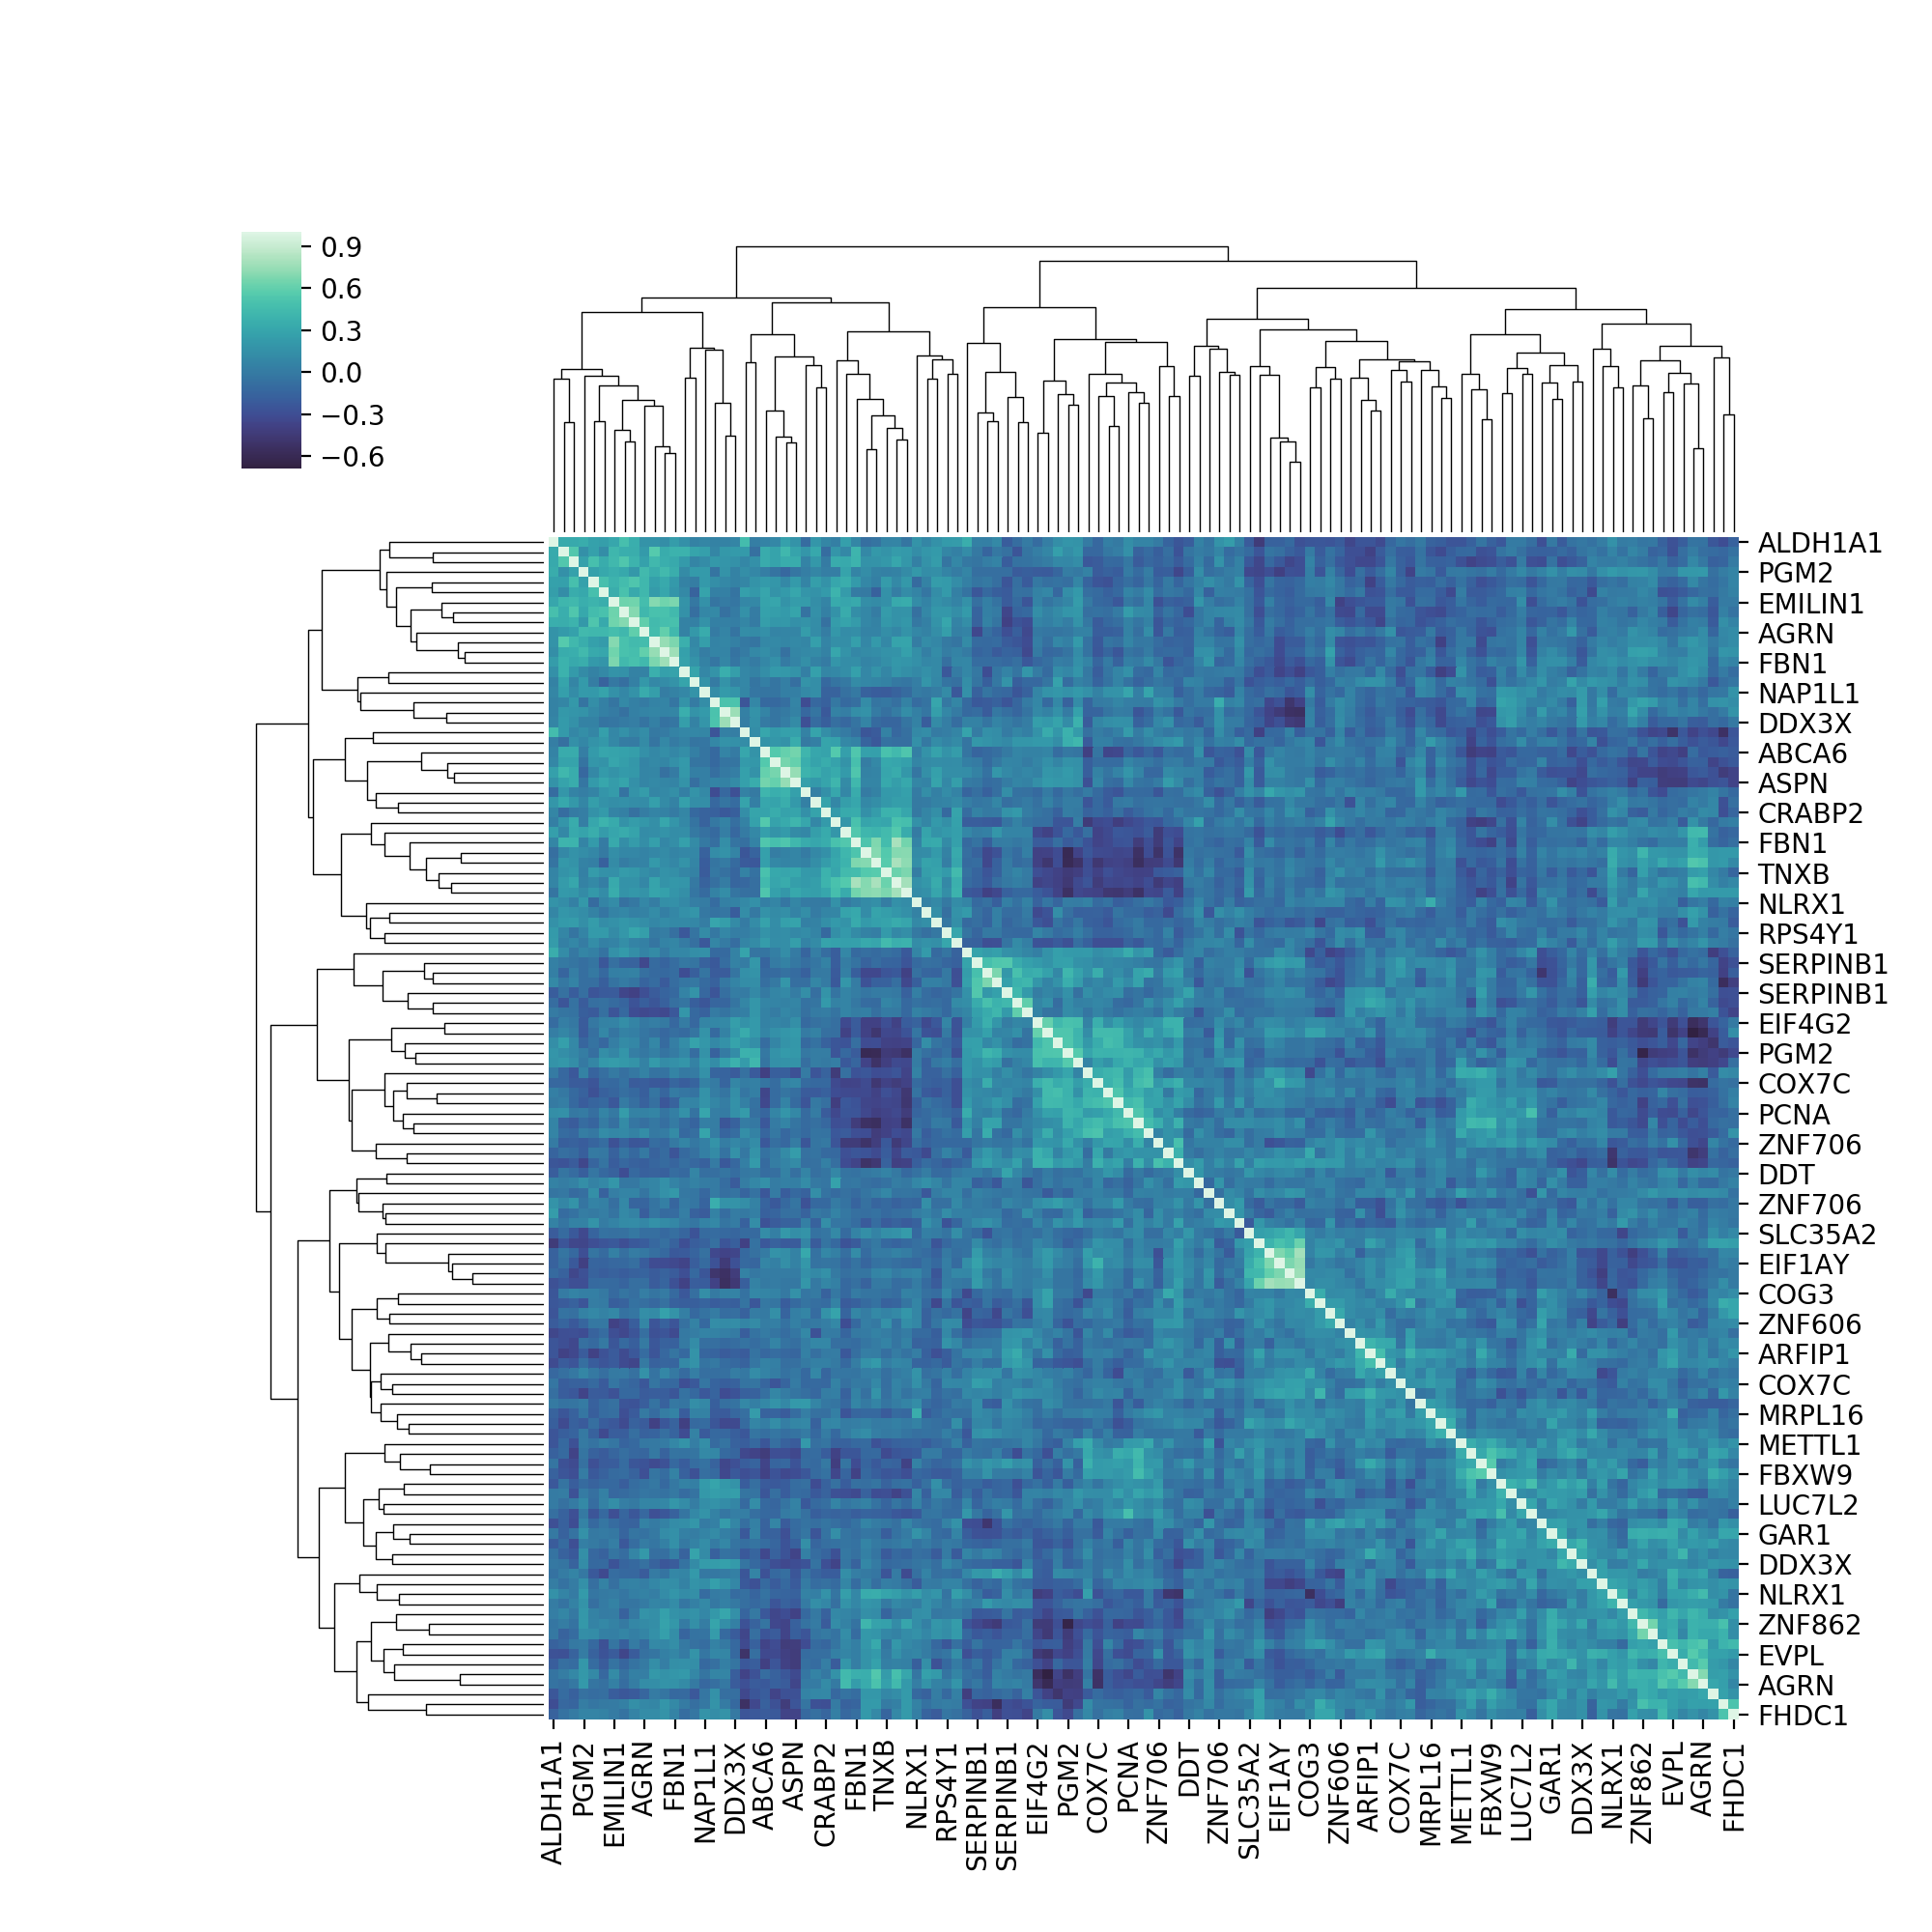

In [19]:
sns.clustermap(train_gender.corr(method='spearman'), center=0, cmap="mako")

In [24]:
train_gender_na = train_combined[[ # gender proteomics with more than 90% availability 
                                    'EMILIN1', 'EIF4G2', 'ARFIP1', 'GAR1',
                                    'TJP2', 'ALDH1A1', 'PGM2', 'LTBP1', 'NNMT', 'COX7C', 'FBN1',
                                    'SERPINB1', 'U2AF1L5', 'COG3', 'FBLN1', 'FLNC', 
                                    'NAP1L1', 'AGRN', 'RCC2', 'COL4A2', 'S100A14', 
                    
                                    # gender rna-seq with more than 90% availability 
                                    'ZFX', 'SRSF6', 'ZRSR2', 
                                    'EVPL', 'LUC7L2', 'ZNF862', 'ODAM', 'RGS4', 
                                    'FOXD2', 'PMS2P3', 'MND1', 'FAM3D', 'DDB2', 
                                    'DDX3X', 'NINJ2', 'COCH', 'IRF5', 'FHDC1', 'ZNF606', 
                                    'FBXW9', 'RPL21P28', 'TLX1', 'HEBP2', 'TRIM29', 'ZNF273', 'KCNJ2', 
                                    'CRABP2', 'ABCA6', 'MMP17', 'PCNA', 'S100A16', 'UBA6', 'EHBP1', 'THG1L',
                                ]]
columns = train_gender_na.columns

<IPython.core.display.Javascript object>


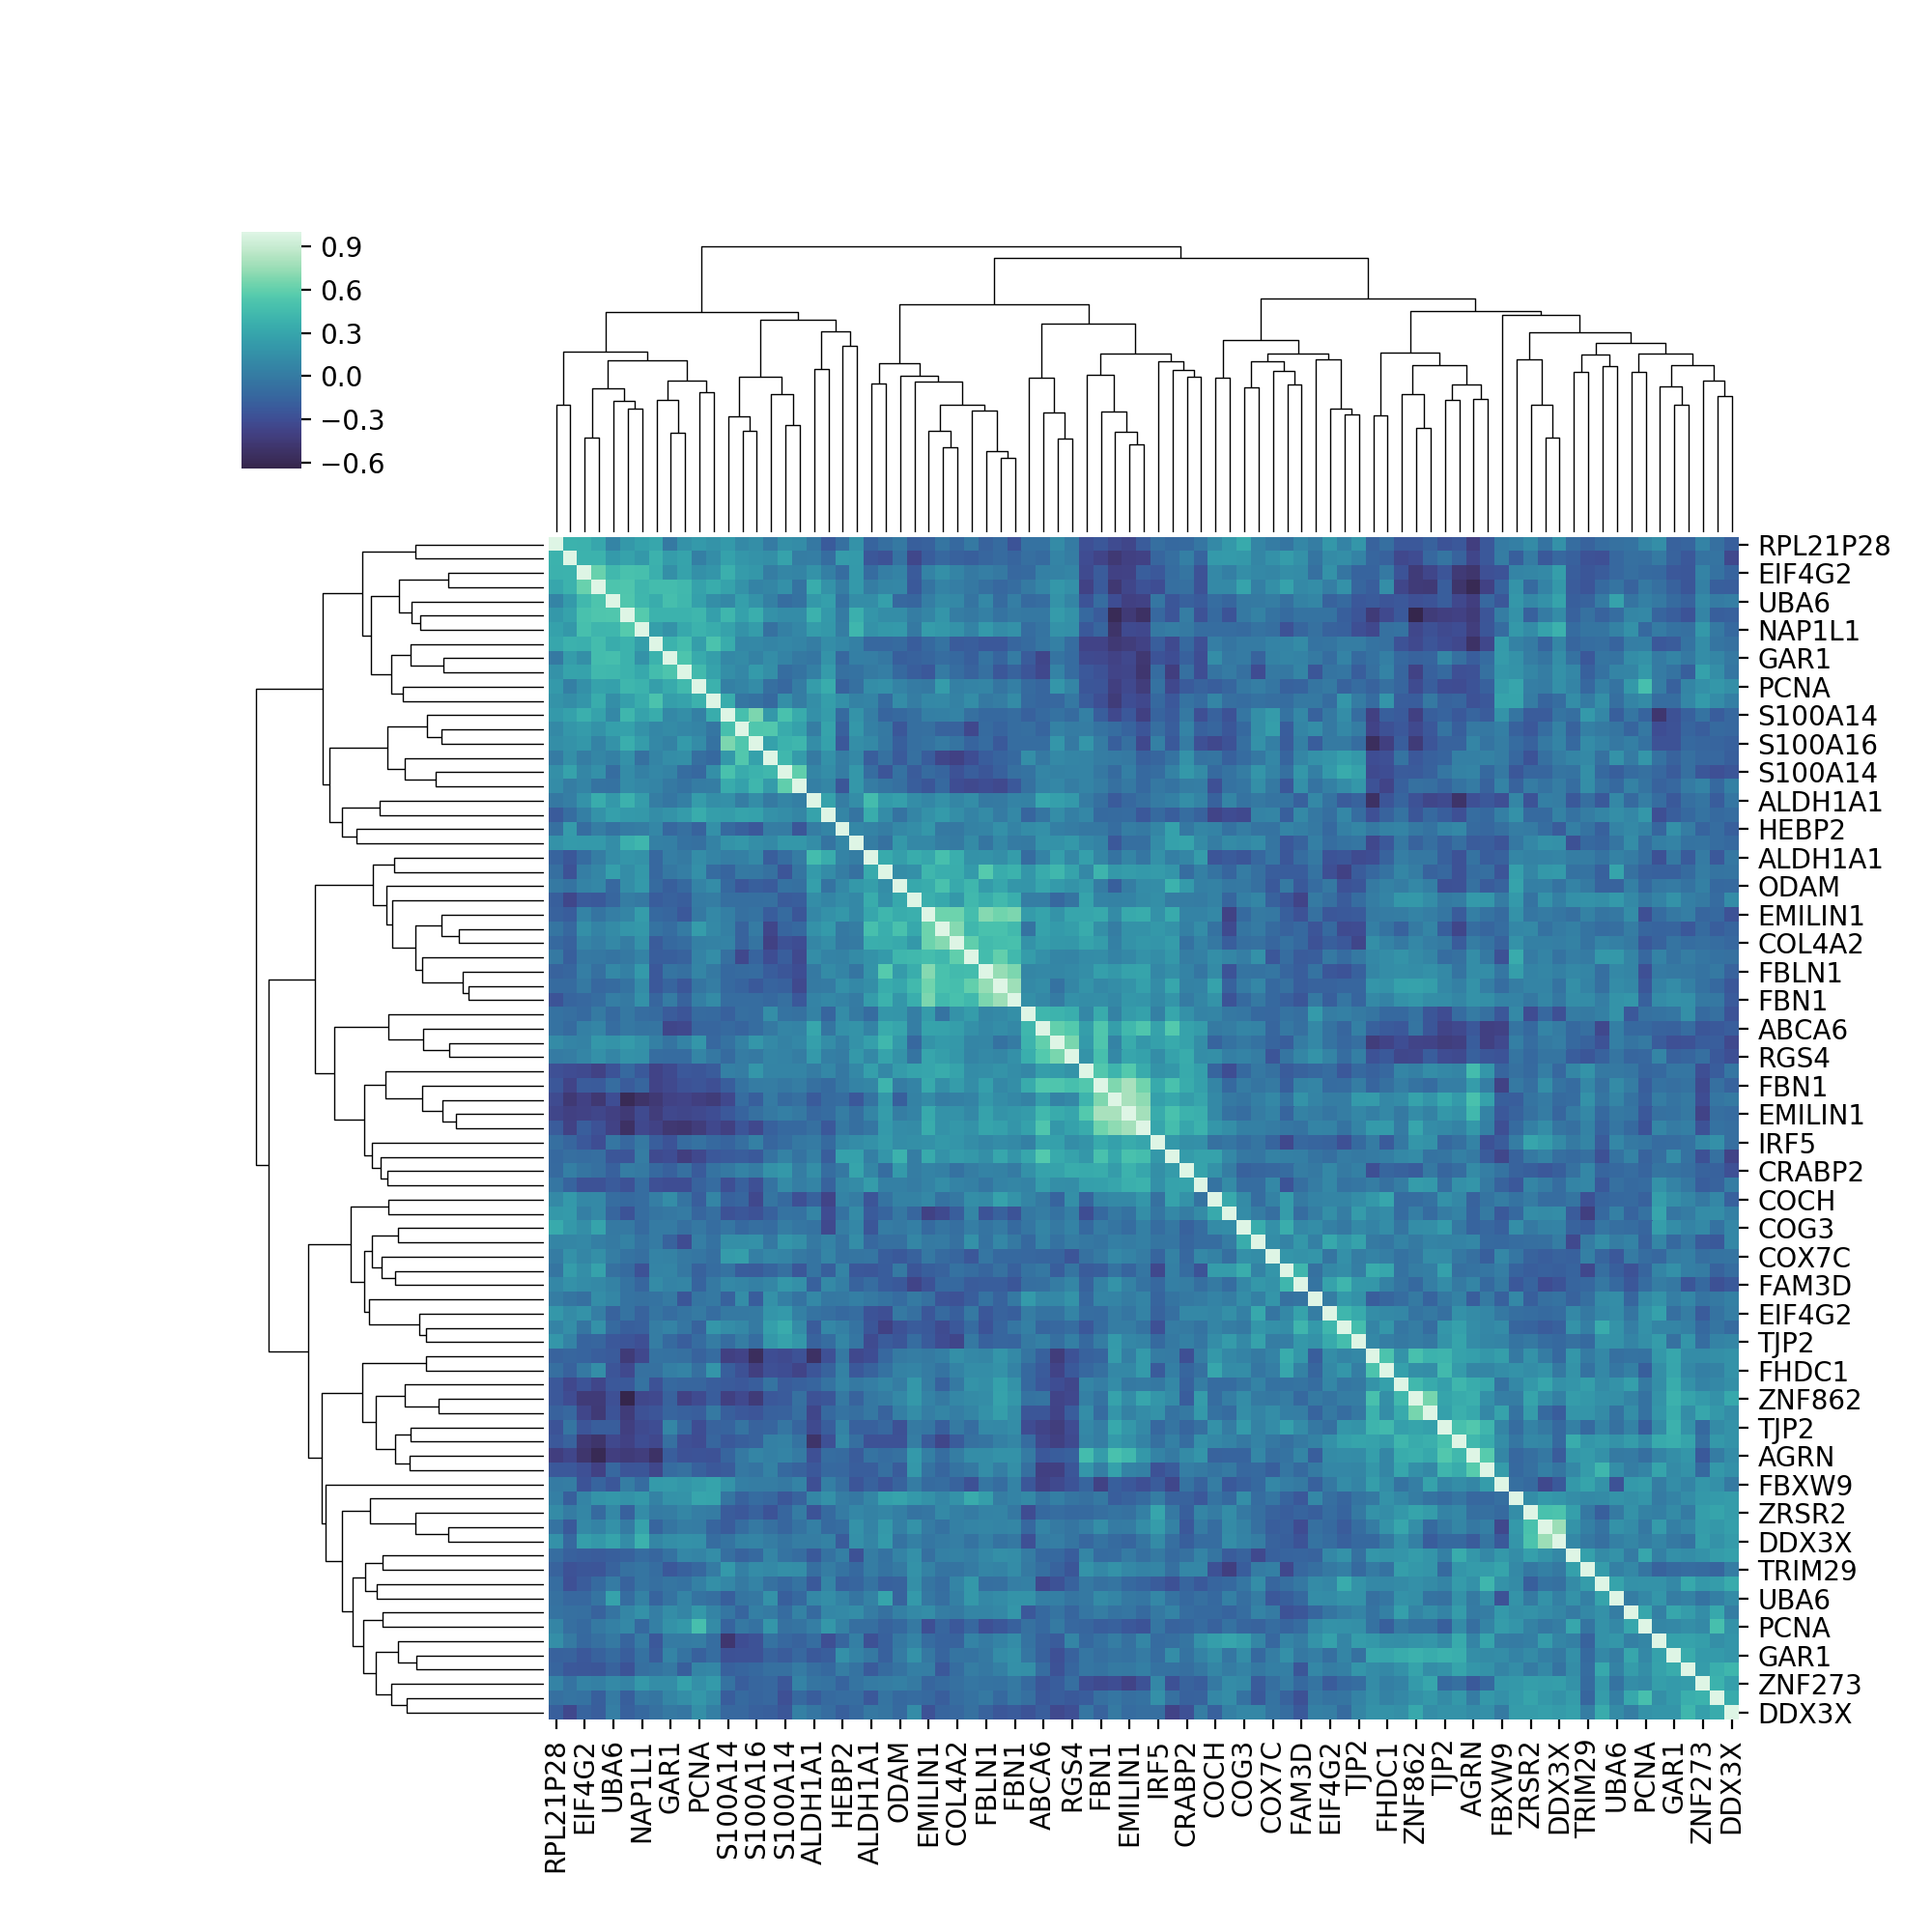

In [21]:
sns.clustermap(train_gender_na.corr(method='spearman'), center=0, cmap="mako")

In [22]:
X_gender_train, X_gender_valid, y_gender_train, y_gender_valid = train_test_split(train_gender_na.values.astype(int),
                                                                                  train_combined.gender.values, 
                                                                                  test_size=0.3)

 1) ZRSR2                          0.211603
 2) ZFX                            0.201825
 3) AGRN                           0.076881
 4) DDX3X                          0.033673
 5) TLX1                           0.030548
 6) FBLN1                          0.027253
 7) LUC7L2                         0.025650
 8) TJP2                           0.024874
 9) NINJ2                          0.023096
10) ODAM                           0.020807
11) ARFIP1                         0.014652
12) COL4A2                         0.012829
13) NNMT                           0.011552
14) NAP1L1                         0.011150
15) U2AF1L5                        0.010761
16) EIF4G2                         0.010239
17) SERPINB1                       0.010074
18) FOXD2                          0.010064
19) COX7C                          0.010044
20) RPL21P28                       0.009981
21) RGS4                           0.009950
22) FLNC                           0.009662
23) S100A16                     

<IPython.core.display.Javascript object>


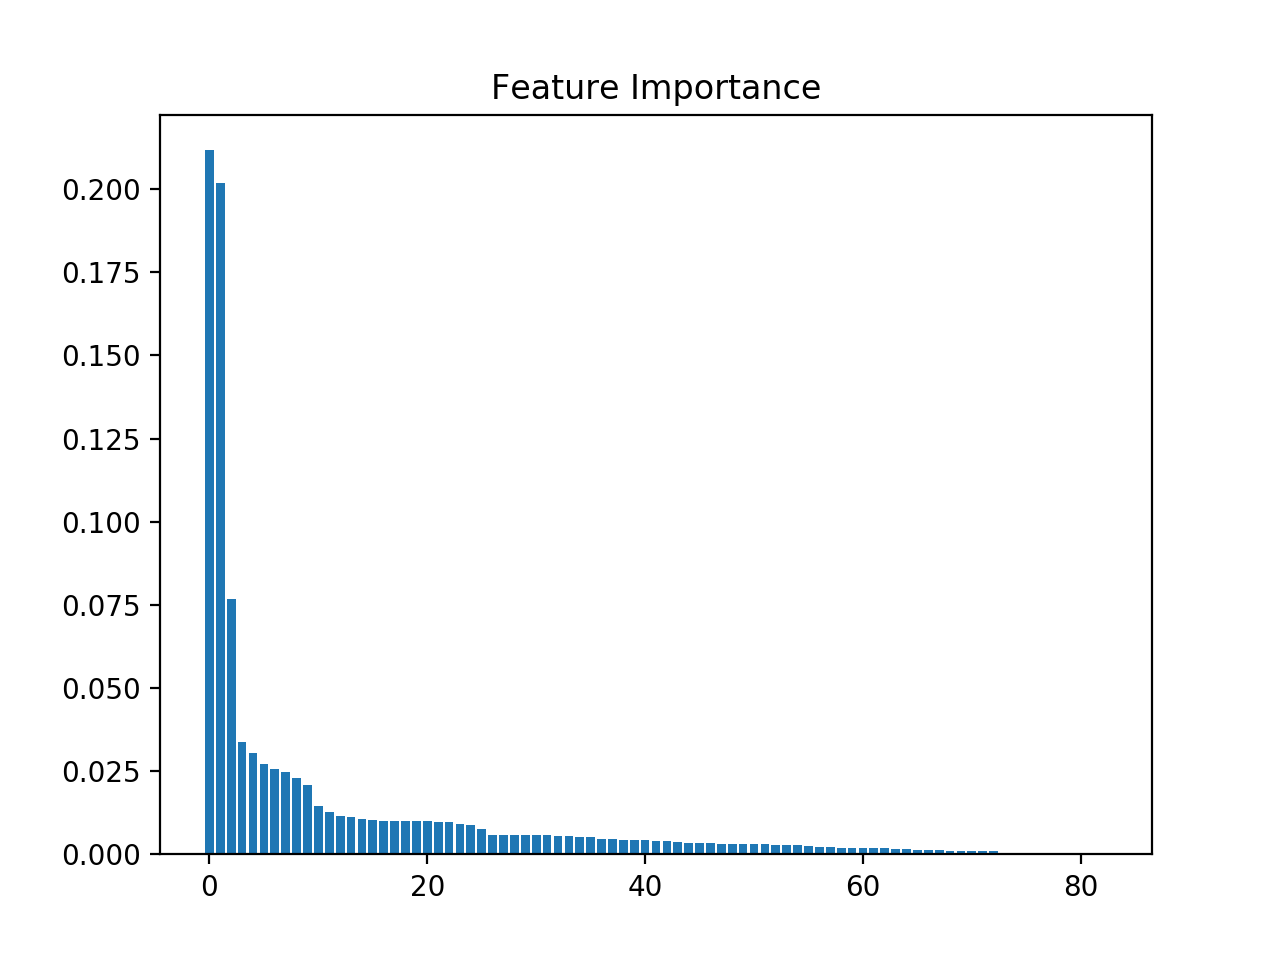

<BarContainer object of 83 artists>

In [25]:
gender_forest = RandomForestClassifier(n_estimators=500, 
                                      min_samples_leaf=3,
                                      max_features=None,
                                      n_jobs=-1,
                                      oob_score=True)

gender_forest.fit(X_gender_train, y_gender_train)

gender_importances = gender_forest.feature_importances_
gender_indices = np.argsort(gender_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(len(columns)):
    print("%2d) %-*s %f" % (f + 1, 30, columns[gender_indices[f]], gender_importances[gender_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_gender_train.shape[1]), gender_importances[gender_indices], align='center')

In [28]:
gender_select = SelectFromModel(gender_forest, threshold=0.00)

gender_select.fit(X_gender_train, y_gender_train)

X_gender_important_train = gender_select.transform(X_gender_train)
X_gender_important_train_df = pd.DataFrame(X_gender_important_train)
X_gender_important_valid = gender_select.transform(X_gender_valid)
gender_forest.fit(X_gender_important_train, y_gender_train)
y_gender_pred = gender_forest.predict(X_gender_important_valid)
print('Random Forest: \n', classification_report(y_true=y_gender_valid, y_pred=y_gender_pred))
print('OOB score: ', gender_forest.oob_score_)

Random Forest: 
              precision    recall  f1-score   support

          0       0.71      1.00      0.83         5
          1       1.00      0.89      0.94        19

avg / total       0.94      0.92      0.92        24

OOB score:  0.8214285714285714
